In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import brain

In [ ]:
train_df = pd.read_csv('titanic_train.csv')
test_df = pd.read_csv('titanic_test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


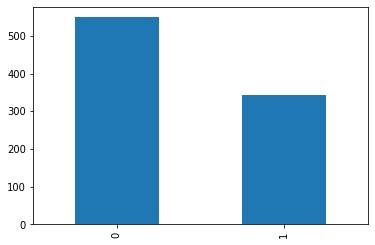

In [ ]:
train_df.Survived.value_counts().plot.bar()

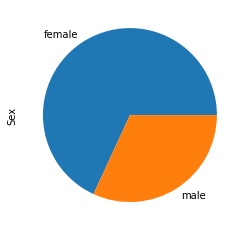

In [ ]:
train_df[train_df.Survived == 1].Sex.value_counts().plot.pie()

In [ ]:
train_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis='columns', inplace=True)
test_passenger_id = test_df.PassengerId
test_df.drop(['Cabin', 'PassengerId', 'Ticket', 'Name'], axis='columns', inplace=True)

In [ ]:
train_df.notnull().value_counts()

Survived  Pclass  Sex   Age    SibSp  Parch  Fare  Embarked
True      True    True  True   True   True   True  True        712
                        False  True   True   True  True        177
                        True   True   True   True  False         2
dtype: int64

In [ ]:
train_df.Age.fillna(train_df.Age.mean(), inplace=True)
train_df.Embarked.fillna('C', inplace=True)
test_df.Age.fillna(test_df.Age.mean(), inplace=True)
test_df.Embarked.fillna('C', inplace=True)
test_df.Fare.fillna(test_df.Fare.mean(), inplace=True)
test_df.isnull().value_counts()

Pclass  Sex    Age    SibSp  Parch  Fare   Embarked
False   False  False  False  False  False  False       418
dtype: int64

In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c21da2290>,
      dtype=object)

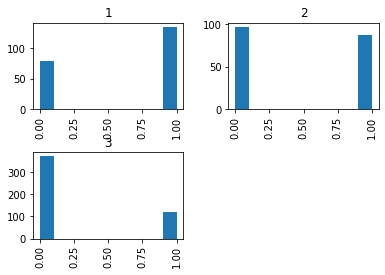

In [ ]:
train_df.hist(column='Survived', by='Pclass')

In [ ]:
sex_categorical = pd.get_dummies(train_df.Sex)
train_df['Male'] = sex_categorical.male
train_df['Female'] = sex_categorical.female
train_df.drop('Sex', axis='columns', inplace=True)

sex_categorical = pd.get_dummies(test_df.Sex)
test_df['Male'] = sex_categorical.male
test_df['Female'] = sex_categorical.female
test_df.drop('Sex', axis='columns', inplace=True)

train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Male,Female
0,0,3,22.0,1,0,7.2500,S,1,0
1,1,1,38.0,1,0,71.2833,C,0,1
2,1,3,26.0,0,0,7.9250,S,0,1
3,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,35.0,0,0,8.0500,S,1,0


In [ ]:
pcs = train_df.groupby('Pclass').Survived.sum()
class1_count = len(train_df[train_df.Pclass == 1])
class2_count = len(train_df[train_df.Pclass == 2])
class3_count = len(train_df[train_df.Pclass == 3])
print('1:', pcs.loc[1] / class1_count * 100)
print('2:', pcs.loc[2] / class2_count * 100)
print('3:', pcs.loc[3] / class3_count * 100)

1: 62.96296296296296
2: 47.28260869565217
3: 24.236252545824847


In [ ]:
pclass_categorical = pd.get_dummies(train_df.Pclass)
train_df['Pclass1'] = pclass_categorical[1]
train_df['Pclass2'] = pclass_categorical[2]
train_df['Pclass3'] = pclass_categorical[3]
train_df.drop('Pclass', axis='columns', inplace=True)

pclass_categorical = pd.get_dummies(test_df.Pclass)
test_df['Pclass1'] = pclass_categorical[1]
test_df['Pclass2'] = pclass_categorical[2]
test_df['Pclass3'] = pclass_categorical[3]
test_df.drop('Pclass', axis='columns', inplace=True)

train_df.head()

,Survived,Age,SibSp,Parch,Fare,Embarked,Male,Female,Pclass1,Pclass2,Pclass3
0,0,22.0,1,0,7.2500,S,1,0,0,0,1
1,1,38.0,1,0,71.2833,C,0,1,1,0,0
2,1,26.0,0,0,7.9250,S,0,1,0,0,1
3,1,35.0,1,0,53.1000,S,0,1,1,0,0
4,0,35.0,0,0,8.0500,S,1,0,0,0,1


In [ ]:
embarked_categorical = pd.get_dummies(train_df.Embarked)
train_df['EmbarkedC'] = embarked_categorical.C
train_df['EmbarkedQ'] = embarked_categorical.Q
train_df['EmbarkedS'] = embarked_categorical.S
train_df.drop('Embarked', axis='columns', inplace=True)

embarked_categorical = pd.get_dummies(test_df.Embarked)
test_df['EmbarkedC'] = embarked_categorical.C
test_df['EmbarkedQ'] = embarked_categorical.Q
test_df['EmbarkedS'] = embarked_categorical.S
test_df.drop('Embarked', axis='columns', inplace=True)

train_df.head()

,Survived,Age,SibSp,Parch,Fare,Male,Female,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1


In [ ]:
'''train_df['Title'] = train_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
test_df['Title'] = test_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)'''
train_df.head()

,Survived,Age,SibSp,Parch,Fare,Male,Female,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,22.0,1,0,7.2500,1,0,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,1,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,0,0,1,0,0,1


In [ ]:
'''title_categorical = pd.get_dummies(train_df.Title).columns
train_df['Title_Capt'] = title_categorical.Capt
train_df['Title_Col'] = title_categorical.Col
train_df['Title_Countess'] = title_categorical.Countess
train_df['Title_Don'] = title_categorical.Don
train_df['Title_Dr'] = title_categorical.Dr
train_df['Title_Jonkheer'] = title_categorical.Jonkheer
train_df['Title_Lady'] = title_categorical.Lady
train_df['Title_Major'] = title_categorical.Major
train_df['Title_Master'] = title_categorical.Master
train_df['Title_Miss'] = title_categorical.Miss
train_df['Title_Mlle'] = title_categorical.Mlle
train_df['Title_Mme'] = title_categorical.Mme
train_df['Title_Mr'] = title_categorical.Mr
train_df['Title_Mrs'] = title_categorical.Mrs
train_df['Title_Ms'] = title_categorical.Ms
train_df['Title_Rev'] = title_categorical.Rev
train_df['Title_Sir'] = title_categorical.Sir

title_categorical = pd.get_dummies(test_df.Title).columns
test_df['Title_Capt'] = title_categorical.Capt
test_df['Title_Col'] = title_categorical.Col
test_df['Title_Countess'] = title_categorical.Countess
test_df['Title_Don'] = title_categorical.Don
test_df['Title_Dr'] = title_categorical.Dr
test_df['Title_Jonkheer'] = title_categorical.Jonkheer
test_df['Title_Lady'] = title_categorical.Lady
test_df['Title_Major'] = title_categorical.Major
test_df['Title_Master'] = title_categorical.Master
test_df['Title_Miss'] = title_categorical.Miss
test_df['Title_Mlle'] = title_categorical.Mlle
test_df['Title_Mme'] = title_categorical.Mme
test_df['Title_Mr'] = title_categorical.Mr
test_df['Title_Mrs'] = title_categorical.Mrs
test_df['Title_Ms'] = title_categorical.Ms
test_df['Title_Rev'] = title_categorical.Rev
test_df['Title_Sir'] = title_categorical.Sir

train_df.he'''

"title_categorical = pd.get_dummies(train_df.Title).columns\ntrain_df['Title_Capt'] = title_categorical.Capt\ntrain_df['Title_Col'] = title_categorical.Col\ntrain_df['Title_Countess'] = title_categorical.Countess\ntrain_df['Title_Don'] = title_categorical.Don\ntrain_df['Title_Dr'] = title_categorical.Dr\ntrain_df['Title_Jonkheer'] = title_categorical.Jonkheer\ntrain_df['Title_Lady'] = title_categorical.Lady\ntrain_df['Title_Major'] = title_categorical.Major\ntrain_df['Title_Master'] = title_categorical.Master\ntrain_df['Title_Miss'] = title_categorical.Miss\ntrain_df['Title_Mlle'] = title_categorical.Mlle\ntrain_df['Title_Mme'] = title_categorical.Mme\ntrain_df['Title_Mr'] = title_categorical.Mr\ntrain_df['Title_Mrs'] = title_categorical.Mrs\ntrain_df['Title_Ms'] = title_categorical.Ms\ntrain_df['Title_Rev'] = title_categorical.Rev\ntrain_df['Title_Sir'] = title_categorical.Sir\n\ntitle_categorical = pd.get_dummies(test_df.Title).columns\ntest_df['Title_Capt'] = title_categorical.Capt\

In [ ]:
train_df.Age /= 100
train_df.Fare /= 100
train_df.Parch /= 10
train_df.SibSp /= 10

test_df.Age /= 100
test_df.Fare /= 100
test_df.Parch /= 10
test_df.SibSp /= 10

train_df.head()

,Survived,Age,SibSp,Parch,Fare,Male,Female,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedQ,EmbarkedS
0,0,0.22,0.1,0.0,0.072500,1,0,0,0,1,0,0,1
1,1,0.38,0.1,0.0,0.712833,0,1,1,0,0,1,0,0
2,1,0.26,0.0,0.0,0.079250,0,1,0,0,1,0,0,1
3,1,0.35,0.1,0.0,0.531000,0,1,1,0,0,0,0,1
4,0,0.35,0.0,0.0,0.080500,1,0,0,0,1,0,0,1


In [ ]:
'''survived_categorical = pd.get_dummies(train_df.Survived)
target_df = pd.DataFrame({'Survived': survived_categorical[1], 'Died': survived_categorical[0]})
train_df.drop('Survived', axis='columns', inplace=True)'''
target_df = train_df.Survived
train_df.drop('Survived', axis='columns', inplace=True)

In [ ]:
train_df.head()

,Age,SibSp,Parch,Fare,Male,Female,Pclass1,Pclass2,Pclass3,EmbarkedC,EmbarkedQ,EmbarkedS
0,0.22,0.1,0.0,0.072500,1,0,0,0,1,0,0,1
1,0.38,0.1,0.0,0.712833,0,1,1,0,0,1,0,0
2,0.26,0.0,0.0,0.079250,0,1,0,0,1,0,0,1
3,0.35,0.1,0.0,0.531000,0,1,1,0,0,0,0,1
4,0.35,0.0,0.0,0.080500,1,0,0,0,1,0,0,1


In [ ]:
target_df.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X = train_df.to_numpy()
Y = target_df.to_numpy()
Y = Y.reshape(Y.size, 1)
print(X)
print(Y)

[[0.22       0.1        0.         ... 0.         0.         1.        ]
 [0.38       0.1        0.         ... 1.         0.         0.        ]
 [0.26       0.         0.         ... 0.         0.         1.        ]
 ...
 [0.29699118 0.1        0.2        ... 0.         0.         1.        ]
 [0.26       0.         0.         ... 1.         0.         0.        ]
 [0.32       0.         0.         ... 0.         1.         0.        ]]
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 

In [ ]:
params = np.random.rand(X.shape[1] + 1)
brain.gradient_descent(X, Y, brain.logistic, 1, brain.logloss, params, iterations=10000, learning_rate=0.01)

Iteration: 0, Loss: 1.268048365933351
Iteration: 100, Loss: 1.0178986747728225
Iteration: 200, Loss: 0.846826097970378
Iteration: 300, Loss: 0.7391334328529312
Iteration: 400, Loss: 0.6707396977304465
Iteration: 500, Loss: 0.62440015490162
Iteration: 600, Loss: 0.5909123961478954
Iteration: 700, Loss: 0.5656544813824487
Iteration: 800, Loss: 0.5461104082247388
Iteration: 900, Loss: 0.5307354217965017
Iteration: 1000, Loss: 0.518490052286331
Iteration: 1100, Loss: 0.5086365721293693
Iteration: 1200, Loss: 0.500635675406932
Iteration: 1300, Loss: 0.4940857348371266
Iteration: 1400, Loss: 0.4886834865157115
Iteration: 1500, Loss: 0.48419723223394184
Iteration: 1600, Loss: 0.48044806230647563
Iteration: 1700, Loss: 0.47729647072880027
Iteration: 1800, Loss: 0.47463268819237364
Iteration: 1900, Loss: 0.4723696187786986
Iteration: 2000, Loss: 0.4704376223053123
Iteration: 2100, Loss: 0.4687806194570223
Iteration: 2200, Loss: 0.467353155090255
Iteration: 2300, Loss: 0.4661181628431517
Iterati

In [ ]:
print(params)

[ 0.40473422  1.03043504  0.63328385 -0.28219296  1.16766866 -1.461314
 -0.43786031  0.11666689  1.18776381 -0.34798235 -0.07256771  0.18555025
 -0.34719586]


In [ ]:
(np.sign(brain.logistic(X, 1, params) - 0.5).flat == np.sign(Y - 0.5).flat).mean()

0.7934904601571269

In [ ]:
X_test = test_df.to_numpy()
print(X.shape, X_test.shape)
set(train_df.columns) - set(test_df.columns)

(891, 12) (418, 12)


set()

In [ ]:
predictions = brain.logistic(X_test, 1, params)
predictions = predictions.reshape(predictions.size)
predictions

array([0.11372856, 0.54033236, 0.25196308, 0.09290918, 0.55340967,
       0.09757913, 0.64415005, 0.21207603, 0.71428281, 0.08190668,
       0.09161868, 0.33604477, 0.89059551, 0.19665303, 0.87437223,
       0.87190092, 0.2746059 , 0.15124622, 0.56100403, 0.69146696,
       0.4519847 , 0.09240698, 0.88367532, 0.49756378, 0.94518699,
       0.07883519, 0.9319403 , 0.15046853, 0.3434325 , 0.12700674,
       0.20509809, 0.20800015, 0.53245292, 0.53721759, 0.47598662,
       0.15255124, 0.58306997, 0.59258128, 0.09379431, 0.10368976,
       0.13662986, 0.35074546, 0.0880584 , 0.80558247, 0.87257829,
       0.09341722, 0.46681156, 0.11544173, 0.9286942 , 0.55173997,
       0.3545664 , 0.34163588, 0.77221044, 0.90498422, 0.33900812,
       0.08553168, 0.0900387 , 0.09335152, 0.0851831 , 0.9604202 ,
       0.09618856, 0.22897485, 0.09580163, 0.65159818, 0.57942524,
       0.80892338, 0.65536267, 0.34553187, 0.48011875, 0.90058932,
       0.64977435, 0.09479029, 0.58423586, 0.48206938, 0.95476

In [ ]:
predictions = np.sign(predictions - 0.5) / 2 + 0.5
predictions

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [ ]:
predictions.size

418

In [ ]:
out_df = pd.DataFrame({'PassengerId': test_passenger_id, 'Survived': np.array(predictions, dtype='int')})
out_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
out_df.to_csv('predictions.csv', index=False)